In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [3]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
y=train['label']
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
X=train.drop('label',axis=1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X=X/255
test=test/255

In [7]:
print(X.shape)

(42000, 784)


In [8]:
X= X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
print(X.shape)

(42000, 28, 28, 1)


In [10]:
y = np.array(y)
print(y.shape)

(42000,)


In [11]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1)

In [12]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),padding="same", activation = 'relu', input_shape = X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),padding="same", activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, verbose=1, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
296/296 [==============================] - 15s 50ms/step - loss: 0.3555 - accuracy: 0.8934 - val_loss: 0.1132 - val_accuracy: 0.9636
Epoch 2/10
296/296 [==============================] - 14s 47ms/step - loss: 0.0805 - accuracy: 0.9743 - val_loss: 0.1010 - val_accuracy: 0.9655
Epoch 3/10
296/296 [==============================] - 14s 46ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0455 - val_accuracy: 0.9871
Epoch 4/10
296/296 [==============================] - 14s 46ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0419 - val_accuracy: 0.9867
Epoch 5/10
296/296 [==============================] - 14s 48ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0352 - val_accuracy: 0.9898
Epoch 6/10
296/296 [==============================] - 14s 47ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0328 - val_accuracy: 0.9902
Epoch 7/10
296/296 [==============================] - 14s 46ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0350 - val_accuracy:

In [16]:
test_labels=model.predict(test)
test_labels

array([[ -1.6640767 ,  -4.0147862 ,  27.683786  , ...,   4.184134  ,
         -4.7368317 ,  -4.778964  ],
       [ 19.800825  , -10.491814  ,   1.4609375 , ...,  -2.9365118 ,
         -7.7360826 ,  -4.0588155 ],
       [ -8.011751  ,  -6.14777   ,   0.81803274, ...,  -0.34586155,
          1.3805685 ,  11.552799  ],
       ...,
       [-14.18634   ,  -1.9500998 ,  -0.12925194, ...,  -2.3960686 ,
          4.2322526 ,   0.933715  ],
       [ -7.4951143 ,  -8.466272  ,  -4.3724184 , ...,   3.2117772 ,
         -2.4790618 ,  13.6480665 ],
       [ -5.140025  ,  -3.870848  ,  27.251322  , ...,   0.17336015,
          1.0351129 ,  -4.554805  ]], dtype=float32)

In [17]:
import matplotlib.pyplot as plt

def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy'])
    plt.plot(epochRange,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

    plt.plot(epochRange,history.history['loss'])
    plt.plot(epochRange,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

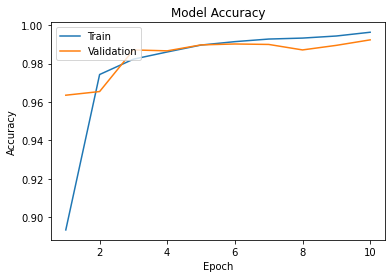

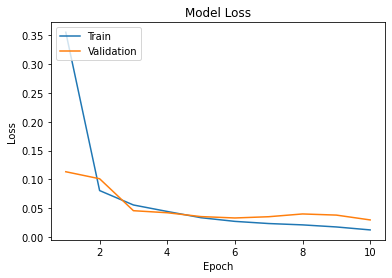

In [18]:
plotLearningCurve(history,10)

In [19]:
test_labels.shape

(28000, 10)

In [20]:
print(history)

In [21]:
results = np.argmax(test_labels,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

print(submission)

submission.to_csv("submission.csv",index=False)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [22]:
results.head()

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64